## Scenario


I have been newly appointed as a Data Analyst in a new Airlines Company and the finance manager wants to discuss and compare prcices from other airlines to decide on a ticket pricing methodology for the company.

I have been given a dataset with datapoints from various airlines. My job is to clean, wrangle and pre-process the data and make the dataset suitable for modeling purposes and hand it over to the Machine Learning Engineer assigned to this project. 

Along the cleaning and pre-processing process, I will also try to find some useful insights that can help with the pricing analysis and answer some business questions.

## Importing the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and Reading the Dataset

Here, I have imported the data from excel format to a pandas dataframe named 'Flight_Data.xlsx'

In [3]:
data_train= pd.read_excel('Flight_Data.xlsx')

In [4]:
data_train.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


## Gathering important Information about the Dataset

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### Here, I just checked if there are any null values for any specific feature and as we can see the feautures: "Route" and "Total_Stops"

In [6]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Dropping the null Values

In [7]:
data_train.dropna(inplace=True)

In [8]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Data Wrangling and Pre-Processing

Before starting the pre-processing and I will make a copy of the dataset so that I can return back to this if I make any mistakes or want to redo the process again.(This really helps sometimes when some columns get deleted accidentally.)

In [9]:
data=data_train.copy()

### Checking data type of the columns




In [10]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

As we can notice, there are a few features that are date and time related,like "Date_of_Journey", "Dep_Time"......., these features can be changed to datetime format so that it is easier to process them at later stages. Pandas has an inbuilt "to_datetime()" function to convert an object to a datetime format.

##### So, this function will take the feature parameter as 'col' and change the dtype of the column to datetime. To do it for all required columns at once, a for loop can be run in a list on the column names and the function can be applied on the columns



In [11]:
def change_to_datetime(col):
    data[col]= pd.to_datetime(data[col])

In [12]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(feature)

/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarn

### Checking dtypes again

As we can see the dtypes for the required columns has been changed to datetimes

In [14]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Separating the "Date_of_Journey" feauture into 3 columns(Date, Month, Year)

It is important to have separate columns for the date, month and Year because a machine learning model cannot understand any other data type other than int or float. The Datapoints must be numeric for a model to fit the data and further make predictions.

In [15]:
data['Journey_day']= data["Date_of_Journey"].dt.day

In [16]:
data['Journey_month']= data["Date_of_Journey"].dt.month

In [17]:
data['Journey_year']= data["Date_of_Journey"].dt.year

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-16 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-16 05:50:00,2023-03-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-16 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-03-16 18:05:00,2023-03-16 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-03-16 16:50:00,2023-03-16 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [19]:
data.drop('Date_of_Journey', axis=1, inplace=True)

### Also features ['Dep_Time', 'Arrival_Time'] need to be separeted into Hour and minutes for the same reason

In [20]:
def extract_hour_min(df,col):
    df[col+ " hour"]= df[col].dt.hour
    df[col+ " min"]= df[col].dt.minute
    df.drop(col, axis=1, inplace=True)
    return df.head(2)

In [21]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [22]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


## Analysis Question 1

##### What time of the day do most flights depart?

To answer this question I have divided the day into 6 phases (Early Morning, Morning, Afternoon, Evening, Night, Late Night).

The feature that will help us determine this is the newly created "Dep_Time_Hour" and its value lies anywhere between 0-24.

##### This function creates these 6 time phases of the day with if and else conditional statements. The parameter to be given here is the dep_time_hour column name

In [28]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

### Apply the function to the Dep_Time_Hour column using the apply function

Here I have tried to visually show what time in the day most flights depart and from the data it can be concluded that clearly most flights depart "Early Morning", i.e between 4-8 am. 

<AxesSubplot:ylabel='Dep_Time hour'>

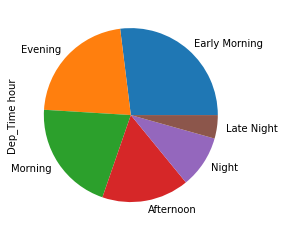

In [41]:
data["Dep_Time hour"].apply(flight_dep_time).value_counts().plot(kind='pie')

### Visualising the the relationship between Departure Time and Price for every airline

In [97]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(data, x="Dep_Time hour", y="Price", trendline="ols", title="Flight Prices by Departure Time and Airline")

# Customize the plot
fig.update_layout(
    xaxis_title="Departure Time (hour)",
    yaxis_title="Price",
    legend_title="Airline",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)

# Show the plot
fig.show()

From the Visualisation above we can infer that price is slightly higher between the hours 4-8 (same time period also having maximum departures)

Therefore it can be concluded that there is more demand during that time period and that having more flights to fly for that time period is more profitable.

This is an important insight since aircraft parkings are booked very much in advance and are very expensive.

### Pre-processing the feauture 'Duration'

In [54]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


If you notice the duration column, it's a string dtype and in the format of 'x'h 'y'm where x is the hour and y is the minutes. First we need to have a standard format for the datapoints.

But there is a problem with the datapoints in Duration column, which is if x=0 then it's only written 'y'm and if y=0 then it's only written 'x'h. We need a format such that even if either x or y =0, the data point must be ('x'h 0m) or (0h 'y'm)

To do this, I have written a function that will check whether or not "h" or "m" are present in the string and if not add "0h" or "0m" respectively.

In [55]:
def pre_processing_duration(x):
    if "h" not in x:
        x= "0h "+x
    if "m" not in x:
        x= x+ " 0m"
    return x

###### Applying the function to the Duration column

In [56]:
data["Duration"]= data["Duration"].apply(pre_processing_duration)

In [58]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


### Now Split the Duration Columns into Duration_hours and Duration_min

Now I can easily use the .split() function to access the the hours and minutes separately.
To do this, here I have used a lambda function(). A lambda function is an anonymous function and can take any number of arguments, but can only have one expression.

In [59]:
data["Duration_hours"]= data["Duration"].apply(lambda x:int(x.split(" ")[0][0:-1]))

In [60]:
data["Duration_min"]= data["Duration"].apply(lambda x:int(x.split(" ")[1][0:-1]))

In [64]:
data.drop("Duration", axis=1, inplace=True)

In [99]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min,total_duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


===================================================================================================================

## Analysis Question 2

###### Does Duration Minutes affect Price?

I will make a new column for Total Duration Minutes and visualise its relationship with price

In [ ]:
data['total_duration_minutes']=data['Duration_hours']*60+data['Duration_min']

In [73]:
fig2 = px.scatter(data, x="total_duration_minutes", y="Price", trendline= "ols", title="Duration Vs Price")
fig2.show()

===================================================================================================================

## Analysis Question 3

###### What is the most frequent Source and Destination?/ (Most Frequent Route)

This is an important insight to understand the demands of the flyers and allot more flights for the sources and destinations that are in high demand and pre-book parking spaces.

In [76]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [77]:
data["Destination"].replace("New Delhi", "Delhi", inplace= True)

<AxesSubplot:>

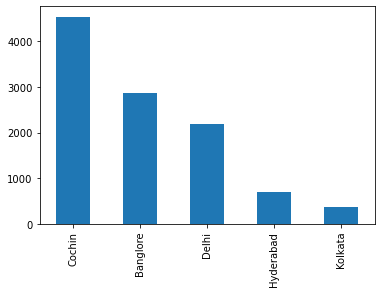

In [78]:
data["Destination"].value_counts().plot(kind="bar")

##### Knowing the most used route by  Top Competitors is also a good way to schedule flights

In [79]:
jet_airways=data[data["Airline"]=="Jet Airways"]

<AxesSubplot:>

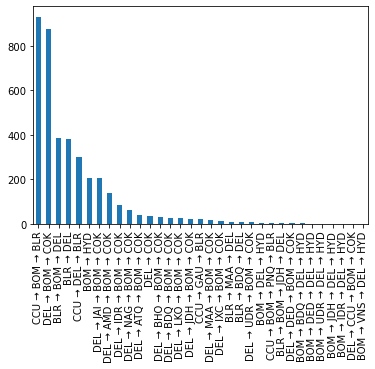

In [80]:
jet_airways["Route"].value_counts().plot(kind="bar")

In [84]:
indigo=data[data["Airline"]=="IndiGo"]

<AxesSubplot:>

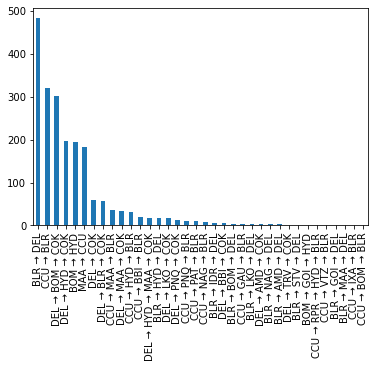

In [85]:
indigo["Route"].value_counts().plot(kind="bar")

In [89]:
vistara=data[data["Airline"]=="Vistara"]

<AxesSubplot:>

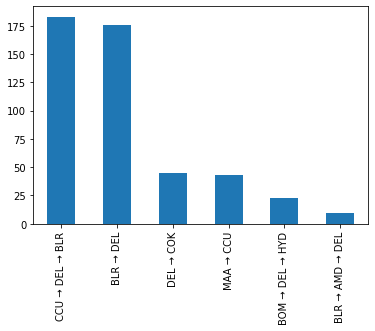

In [90]:
vistara["Route"].value_counts().plot(kind="bar")

In [93]:
air_asia=data[data["Airline"]=="Air Asia"]

<AxesSubplot:>

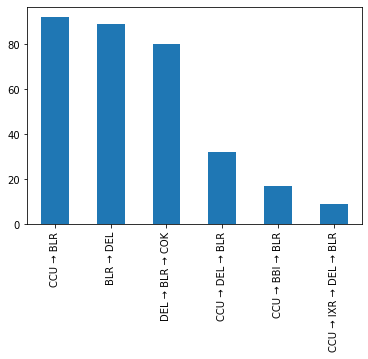

In [94]:
air_asia["Route"].value_counts().plot(kind="bar")

In [95]:
spicejet=data[data["Airline"]=="SpiceJet"]

<AxesSubplot:>

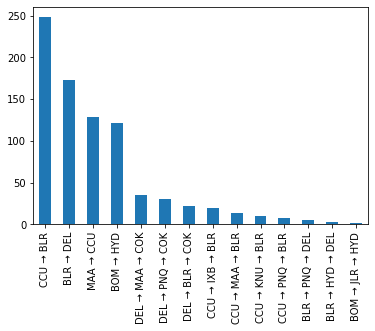

In [96]:
spicejet["Route"].value_counts().plot(kind="bar")

In [ ]:
spicejet=data[data["Airline"]=="SpiceJet"]

In [ ]:
spicejet["Route"].value_counts().plot(kind="bar")

##### From the Visualisations we can confirm that that most frequently flown route by most airlines is CCU->BLR (Kolkata to Banglore). Therefore more flights must be allotted for this particular route

==================================================================================================================

## Analysis Question 2

###### Airline Vs Price Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

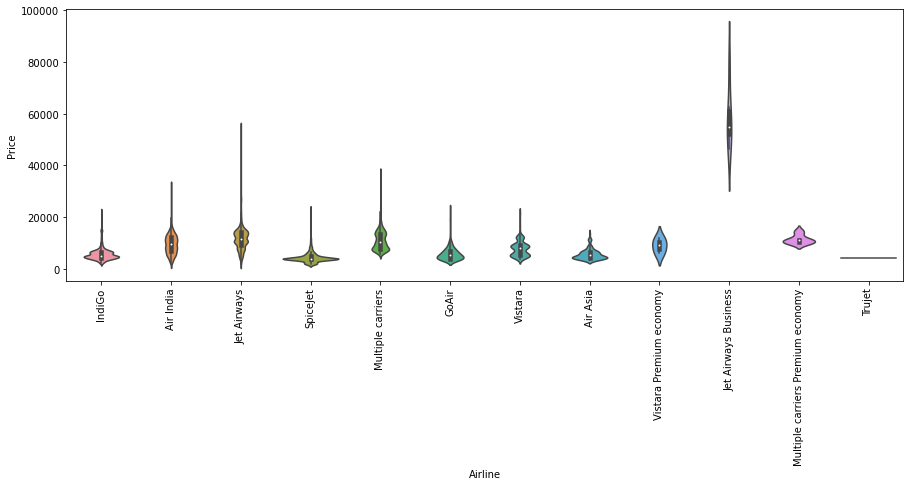

In [104]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

==================================================================================================================

## Removing Unnecessary columns

Let's check the "Additional Info" feauture

In [326]:
np.round(data["Additional_Info"].value_counts()/len(data)*100, 2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [106]:
data["Journey_year"].unique()

array([2019])

Since 78% of the feature is "No info" it can be removed. 

Also, columns "Route" is not needed because firstly, we already know which route is most frequentlt used. 

"Journey_year" can also be removed since the dataset is only for the year 2019

"total_duration_mins" can also be removed as we have separate columns for hours and mins


In [113]:
data.drop(["Additional_Info", "Route", "Journey_year", "total_duration_minutes"], axis=1, inplace=True)

In [114]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25


### This can be used as a one-hot encoder but in this case target encoding is preferrable otherwise there will be too many features and we could face the curse of dimesionality 

In [330]:
#for category in data["Source"].unique():
#    data["Source_"+ category]= data["Source"].apply(lambda x: 1 if x==category else 0)

###### Now we need to check what features are yet to be converted to int or float to make it applicable for the machine learning model

In [115]:
[col for col in data.columns if data[col].dtype=="object"]

['Airline', 'Source', 'Destination', 'Total_Stops']

####  This function will convert dtype from Object to int.

What this function is exactlt doing is taking the col parameter and group with respect to that column taking the mean of the "Price" column and saving the index to a list. 

Then it is creating a dictionary that enumerates with the list "list" from 0. Basically make a dict like: "{Jet Airways:1, Indigo: 2"}. 

Then it maps this dictionary with the column.



In [117]:
def my_target_encoder(col, data):
    list=data.groupby(col)["Price"].mean().sort_values().index
    dict1={key:index for index,key in enumerate(list, 0)}
    data[col]= data[col].map(dict1)
    
    

These are the columns that we want to convert to int dtype

In [118]:
target_cols= ["Airline", "Source", "Destination"]

In [119]:
for feature in target_cols:
    my_target_encoder(feature, data)

In [120]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min
0,3,2,2,non-stop,3897,24,3,22,20,1,10,2,50
1,7,3,3,2 stops,7662,5,1,5,50,13,15,7,25
2,10,4,4,2 stops,13882,6,9,9,25,4,25,19,0
3,3,3,3,1 stop,6218,5,12,18,5,23,30,5,25
4,3,2,2,1 stop,13302,3,1,16,50,21,35,4,45


#### Now only the column "Total_Stops" is remaining to convert from object dtype to int

In [351]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

#### Since there are only 4 unique data points, we can manually create a dictionary and map the dictionary to the "Total_Stops" column

In [352]:
stops= {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [353]:
data["Total_Stops"]=data["Total_Stops"].map(stops)

In [354]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min
0,3,2,2,0,3897,24,3,22,20,1,10,2,50
1,7,3,3,2,7662,5,1,5,50,13,15,7,25
2,10,4,4,2,13882,6,9,9,25,4,25,19,0
3,3,3,3,1,6218,5,12,18,5,23,30,5,25
4,3,2,2,1,13302,3,1,16,50,21,35,4,45


##### Now the dataset is ready, such that a machine learning model can be built and price predictions can be made. So the dataset is now cleaned and can be handed over to the Machine Learning Engineer.

====================================================================================================================

## Extra Analysis 

I will check the the distribution of the data overall to check for any outliers

In [127]:
def plot(df, col):
    fig,(ax1, ax2, ax3)= plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



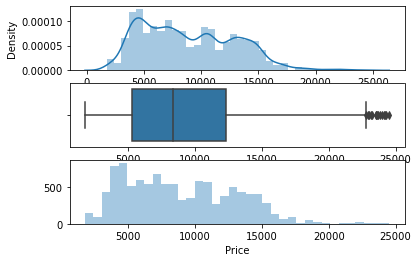

In [130]:
 plot(data,"Price")

##### Since there are too many outliers, to get rid of them I will convert any prices > 25000 to the median of the price column.

In [131]:
data["Price"]=np.where(data["Price"]>=25000, data["Price"].median(), data["Price"])

/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



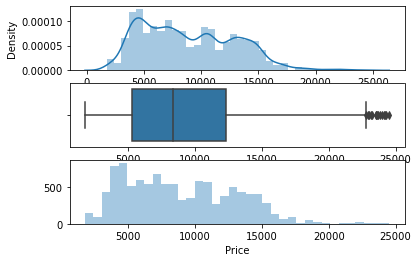

In [132]:
plot(data,"Price")

In [359]:
data.drop("Source", axis=1, inplace=True)

In [360]:
from sklearn.feature_selection import mutual_info_regression

In [361]:
X=data.drop("Price", axis=1)

In [362]:
y=data["Price"]

In [363]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [364]:
X.dtypes

Airline              int64
Destination          int64
Total_Stops          int64
Journey_day          int64
Journey_month        int64
Dep_Time hour        int64
Dep_Time min         int64
Arrival_Time hour    int64
Arrival_Time min     int64
Duration_hours       int64
Duration_min         int64
dtype: object

In [365]:
mutual_info_regression(X,y)

array([0.98395545, 1.00003139, 0.78879379, 0.18699686, 0.25450344,
       0.33296268, 0.25583681, 0.39099649, 0.3453574 , 0.45923532,
       0.34478157])

In [366]:
scores= pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
scores.columns=["Importance"]

In [367]:
scores.sort_values(by="Importance", ascending=False)

,Importance
Destination,0.998564
Airline,0.978511
Total_Stops,0.789606
Duration_hours,0.466829
Arrival_Time hour,0.403402
Dep_Time hour,0.345225
Arrival_Time min,0.338584
Duration_min,0.331885
Dep_Time min,0.261217
Journey_month,0.246441


In [368]:
from sklearn.model_selection import train_test_split

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [370]:
from sklearn.ensemble import RandomForestRegressor

In [371]:
ml_model= RandomForestRegressor()

In [372]:
model= ml_model.fit(X_train, y_train)

In [373]:
y_pred=model.predict(X_test)

In [374]:
y_pred

array([16741.58,  6101.63,  8785.45, ...,  3519.91,  6236.54,  7047.47])

In [375]:
#import pickle

In [376]:
#file=open(r"rf.random.pkl", "wb")

In [377]:
#pickle.dump(model, file)

In [378]:
#model= open(r"rf.random.pkl", "rb")

In [379]:
#forest=pickle.load(model)

In [380]:
#forest.predict(X_test)

In [381]:
def mape(y_true, y_pred):
    y_true, y_pred= np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
 

In [382]:
mape(y_test, y_pred)

13.354815892263646

# Automating ML Pipleline

In [383]:
def predict(ml_model):
    
    model= ml_model.fit(X_train, y_train)
    print("Training Score: {}".format(model.score(X_train, y_train)))
    y_prediction= model.predict(X_test)
    print("Prediction: {}".format(y_prediction))
    print("\n")
    
    from sklearn import metrics
    
    print("r2_score: ",metrics.r2_score(y_test, y_prediction))
    print("MSE: ",metrics.mean_squared_error(y_test, y_prediction))
    print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    print("MAE: ",metrics.mean_absolute_error(y_test, y_prediction))
    print("MAPE: {}".format(mape(y_test, y_prediction)))
    sns.distplot(y_test-y_prediction)
    

Training Score: 0.9504770585173496
Prediction: [16752.57  6376.62  8766.54 ...  3595.95  6530.34  6898.27]


r2_score:  0.8107483062733742
MSE:  3528449.489137399
RMSE:  1878.4167506539648
MAE:  1182.519441164601
MAPE: 13.306674820241346


/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


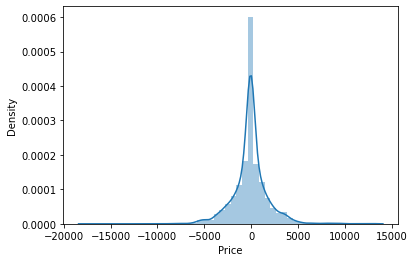

In [384]:
predict(RandomForestRegressor())

# Hypertuning

In [385]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


In [386]:
reg_rf= RandomForestRegressor()

In [387]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [388]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [389]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [390]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [391]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
rf_Random.best_params_

In [ ]:
pred2=rf_Random.predict(X_test)